This notebook describes a simple machine learning process to predict today's temperature. It is based on 2016 data of seattle. Finding more recent data was quite challenging. After building the model. I will find a larger time-series data to train the model on. 

The question considered here is - if i know yesterday's max temperature and the day before's, can I predict today's temperature?

We will compare our result to NOAA's predictions as well as a friend of mine's who claims to know all about temperature prediction.

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt


In [3]:
data = pd.read_csv('temps.csv')
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Data dictionary
1. year: 2016 for all data points
2. month: number for month of the year
3. day: number for day of the year
4. week: day of the week as a character string
5. temp_2: max temperature 2 days prior
6. temp_1: max temperature 1 day prior
7. average: historical average max temperature
8. actual: max temperature measurement
9. friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb0cd213588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb0cd213588>)

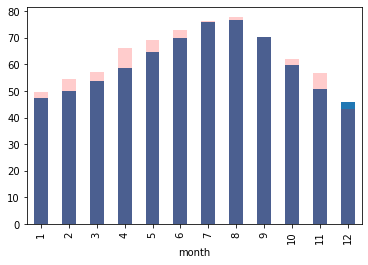

In [10]:
data.groupby('month').average.mean().plot.bar(),data.groupby('month').actual.mean().plot.bar(alpha =0.2, color = 'red')

In [11]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [13]:
print(data.isnull().sum(), '\n', 'No missing information!')

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64 
 No missing information!


In [16]:
data.corr()['actual']**2

year                   NaN
month             0.000021
day               0.000470
temp_2            0.649371
temp_1            0.770673
average           0.719724
actual            1.000000
forecast_noaa     0.703316
forecast_acc      0.709191
forecast_under    0.703831
friend            0.323925
Name: actual, dtype: float64

In [21]:
#To visualize changes in temperature with time create date column

data['date'] = data.year.astype(str)+ '-'+ data.month.astype(str)+'-'+ data.day.astype(str)
data.date = pd.to_datetime(data.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            348 non-null    int64         
 1   month           348 non-null    int64         
 2   day             348 non-null    int64         
 3   week            348 non-null    object        
 4   temp_2          348 non-null    int64         
 5   temp_1          348 non-null    int64         
 6   average         348 non-null    float64       
 7   actual          348 non-null    int64         
 8   forecast_noaa   348 non-null    int64         
 9   forecast_acc    348 non-null    int64         
 10  forecast_under  348 non-null    int64         
 11  friend          348 non-null    int64         
 12  date            348 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 35.5+ KB
